### Important required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns',None)


### Objective: To build a model that predict whether or not an employee is likely to leave(1/0) his/her job based on characteristics in the dataset.


In [5]:
#Importation of Data to be analyzed
data=pd.read_excel(r'D:\data science-Class\Class_Materials\All Assignments\Assignment_4_LogisticRegression\Employee-Attrition.xlsx')

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#Number of rows and columns composing dataset
data.shape

(1470, 35)

In [8]:
#List of all columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##### Predict variable (desired target):
Attrition - has the employee left job or not? (binary: '1','0')

In [9]:
data['Attrition']=np.where(data['Attrition']=='Yes','1',data['Attrition'])
data['Attrition']=np.where(data['Attrition']=='No','0',data['Attrition'])


In [10]:
#There is no null data
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Data exploration

In [12]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

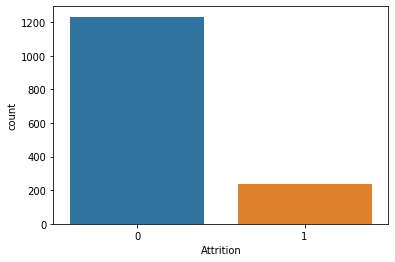

In [13]:
sns.countplot(x='Attrition',data=data)
plt.show()

We have 1233 (No) and 237 (Yes)

In [14]:
#Let analyze all features based on these two classes (No and Yes)
data.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


 We can calculate categorical means for other categorical variables such as: education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance 
 to get a more detailed sense of our data.
 

In [15]:
# 1.Education
data['Education']=np.where(data['Education']=='1','Below College',data['Education'])
data['Education']=np.where(data['Education']=='2','College',data['Education'])
data['Education']=np.where(data['Education']=='3','Bachelor',data['Education'])
data['Education']=np.where(data['Education']=='4','Master',data['Education'])
data['Education']=np.where(data['Education']=='5','Doctor',data['Education'])
data.groupby('Education').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Education,,,,,,,,,,,,,,,,,,,,,,,,,
1,32.164706,822.417647,8.741176,1.0,979.041176,2.747059,65.035294,2.635294,1.794118,2.800000,5640.570588,15208.100000,1.894118,15.482353,3.176471,2.723529,80.0,0.735294,8.788235,2.864706,2.776471,6.488235,3.917647,1.911765,3.623529
Bachelor,36.479021,781.800699,9.243007,1.0,1037.807692,2.776224,65.643357,2.753497,2.068182,2.652098,6517.263986,14082.809441,2.697552,15.131119,3.143357,2.664336,80.0,0.774476,11.260490,2.795455,2.729021,6.860140,4.293706,2.206294,4.092657
College,36.861702,822.095745,9.205674,1.0,985.418440,2.716312,66.223404,2.719858,2.042553,2.769504,6226.645390,14249.946809,2.585106,15.187943,3.170213,2.769504,80.0,0.826241,10.712766,2.847518,2.765957,6.613475,3.914894,1.996454,3.996454
Doctor,39.895833,785.625000,10.500000,1.0,1022.562500,2.645833,68.437500,2.833333,2.520833,2.666667,8277.645833,14516.687500,2.875000,15.645833,3.187500,2.625000,80.0,0.812500,14.083333,3.000000,2.812500,8.354167,4.833333,2.708333,4.687500
Master,39.281407,811.839196,9.145729,1.0,1054.065327,2.645729,66.070352,2.731156,2.133166,2.786432,6832.402010,14281.989950,3.082915,15.168342,3.143216,2.746231,80.0,0.821608,12.434673,2.718593,2.791457,7.560302,4.419598,2.351759,4.402010


Observation:More than 60% of employees have Bachelor,Master's and Doctorate degrees

Text(0, 0.5, 'Proportion of employees')

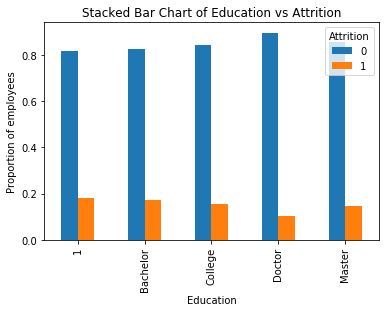

In [16]:
#Visualization
table=pd.crosstab(data.Education,data.Attrition )
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Education vs Attrition')
plt.xlabel('Education')
plt.ylabel('Proportion of employees')


In [17]:
# 2.EnvironmentSatisfaction
data['EnvironmentSatisfaction']=np.where(data['EnvironmentSatisfaction']=='1','Low',data['EnvironmentSatisfaction'])
data['EnvironmentSatisfaction']=np.where(data['EnvironmentSatisfaction']=='2','Medium',data['EnvironmentSatisfaction'])
data['EnvironmentSatisfaction']=np.where(data['EnvironmentSatisfaction']=='3','High',data['EnvironmentSatisfaction'])
data['EnvironmentSatisfaction']=np.where(data['EnvironmentSatisfaction']=='4','Very High',data['EnvironmentSatisfaction'])
data.groupby('EnvironmentSatisfaction').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EnvironmentSatisfaction,,,,,,,,,,,,,,,,,,,,,,,,
1,37.109155,794.894366,9.172535,1.0,1032.880282,66.838028,2.721831,2.095070,2.757042,6717.080986,14032.014085,2.750000,15.348592,3.176056,2.718310,80.0,0.767606,11.676056,2.806338,2.728873,6.897887,3.968310,1.978873,4.109155
High,36.772627,804.260486,9.176600,1.0,987.642384,66.373068,2.719647,2.059603,2.710817,6482.366446,14645.262693,2.602649,15.337748,3.158940,2.717439,80.0,0.810155,11.134658,2.841060,2.799117,7.203091,4.359823,2.240618,4.134658
Medium,36.508711,791.634146,9.599303,1.0,1012.668990,66.940767,2.766551,2.017422,2.721254,6283.728223,13719.519164,2.592334,15.226481,3.146341,2.675958,80.0,0.811847,10.864111,2.825784,2.724739,6.993031,4.331010,2.310105,4.184669
Very High,37.226457,812.500000,8.959641,1.0,1065.417040,64.123318,2.721973,2.078475,2.733184,6528.511211,14536.690583,2.813901,14.979821,3.139013,2.726457,80.0,0.782511,11.441704,2.735426,2.766816,6.890135,4.197309,2.188341,4.080717


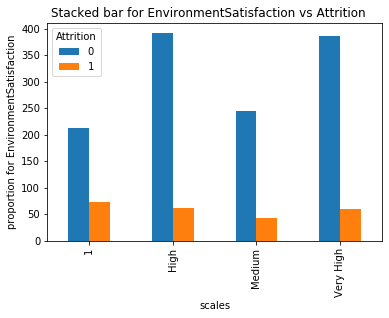

In [18]:
#Visualization
%matplotlib inline
pd.crosstab(data.EnvironmentSatisfaction,data.Attrition).plot(kind='bar')
plt.title('Stacked bar for EnvironmentSatisfaction vs Attrition   ')
plt.xlabel('scales')
plt.ylabel('proportion for EnvironmentSatisfaction')
plt.savefig('purchase_fre_job')

Employees with low environment satisfactions are the ones who left more

In [19]:
#3.JobInvolvement
data['JobInvolvement']=np.where(data['JobInvolvement']=='1','Low',data['JobInvolvement'])
data['JobInvolvement']=np.where(data['JobInvolvement']=='2','Medium',data['JobInvolvement'])
data['JobInvolvement']=np.where(data['JobInvolvement']=='3','High',data['JobInvolvement'])
data['JobInvolvement']=np.where(data['JobInvolvement']=='4','Very High',data['JobInvolvement'])
data.groupby('JobInvolvement').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobInvolvement,,,,,,,,,,,,,,,,,,,,,,,
1,35.975904,726.951807,9.915663,1.0,1096.578313,64.927711,2.012048,2.915663,6418.108434,14664.590361,2.506024,15.807229,3.204819,2.650602,80.0,0.891566,11.192771,2.927711,2.734940,6.939759,4.253012,2.253012,3.987952
High,37.209677,814.279954,9.215438,1.0,1018.976959,66.003456,2.072581,2.745392,6521.637097,14102.298387,2.750000,15.119816,3.150922,2.733871,80.0,0.784562,11.298387,2.824885,2.756912,6.906682,4.241935,2.203917,4.110599
Medium,36.528000,787.968000,8.826667,1.0,1013.650667,64.866667,2.090667,2.680000,6609.648000,14602.298667,2.637333,15.202667,3.154667,2.656000,80.0,0.746667,11.346667,2.754667,2.789333,7.330667,4.162667,2.256000,4.053333
Very High,36.777778,812.736111,9.590278,1.0,1048.229167,68.437500,1.972222,2.645833,6161.159722,14628.083333,2.604167,15.423611,3.138889,2.763889,80.0,0.916667,11.041667,2.687500,2.729167,6.819444,4.312500,1.875000,4.458333


observation:Young employees are less involved and are composing a big part of employees

Text(0, 0.5, 'frequency of jobinvolvement')

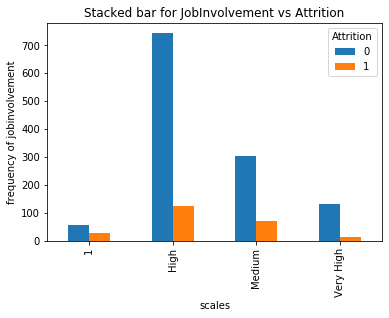

In [20]:
#Visualization
pd.crosstab(data.JobInvolvement,data.Attrition).plot(kind='bar')
plt.title('Stacked bar for JobInvolvement vs Attrition')
plt.xlabel('scales')
plt.ylabel('frequency of jobinvolvement')

In [21]:
#4.JobSatisfaction
data['JobSatisfaction']=np.where(data['JobSatisfaction']=='1','Low',data['JobSatisfaction'])
data['JobSatisfaction']=np.where(data['JobSatisfaction']=='2','Medium',data['JobSatisfaction'])
data['JobSatisfaction']=np.where(data['JobSatisfaction']=='3','High',data['JobSatisfaction'])
data['JobSatisfaction']=np.where(data['JobSatisfaction']=='4','Very High',data['JobSatisfaction'])
data.groupby('JobSatisfaction').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,,,,,,,,,,,,,,,,,,,,,,
1,36.916955,782.505190,9.190311,1.0,1057.885813,68.636678,2.055363,6561.570934,14095.377163,2.871972,15.231834,3.166090,2.730104,80.0,0.788927,11.608997,2.816609,2.771626,6.989619,4.276817,2.314879,4.384083
High,37.022624,835.500000,9.418552,1.0,1024.705882,64.882353,2.074661,6480.495475,14623.020362,2.667421,15.013575,3.126697,2.696833,80.0,0.762443,11.106335,2.742081,2.782805,7.004525,4.285068,2.138009,4.033937
Medium,36.985714,771.675000,9.103571,1.0,1054.414286,66.632143,2.075000,6527.328571,14392.317857,2.839286,15.117857,3.153571,2.735714,80.0,0.800000,11.360714,2.839286,2.767857,7.107143,4.135714,2.200000,4.075000
Very High,36.795207,802.069717,9.030501,1.0,986.202614,64.681917,2.052288,6472.732026,14103.429194,2.516340,15.440087,3.172113,2.701525,80.0,0.823529,11.189542,2.819172,2.729847,6.962963,4.202614,2.148148,4.074074


Urge number of employees had a low level of jobsatisfaction

Text(0, 0.5, 'frequency of JobSatisfaction')

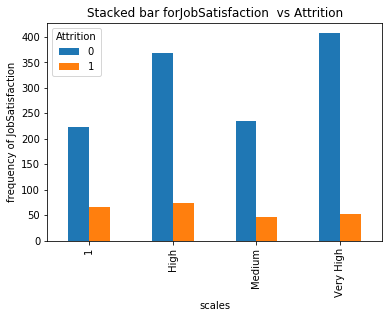

In [22]:
#Visualization
pd.crosstab(data.JobSatisfaction,data.Attrition).plot(kind='bar')
plt.title('Stacked bar forJobSatisfaction  vs Attrition')
plt.xlabel('scales')
plt.ylabel('frequency of JobSatisfaction')

In [23]:
#5.PerformanceRating
data['PerformanceRating']=np.where(data['PerformanceRating']=='1','Low',data['PerformanceRating'])
data['PerformanceRating']=np.where(data['PerformanceRating']=='2','Good',data['PerformanceRating'])
data['PerformanceRating']=np.where(data['PerformanceRating']=='3','Excellent',data['PerformanceRating'])
data['PerformanceRating']=np.where(data['PerformanceRating']=='4','Outstanding',data['PerformanceRating'])
data.groupby('PerformanceRating').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
Excellent,36.916399,802.404341,9.098875,1.0,1030.087621,65.909968,2.073955,6537.274116,14342.859325,2.708199,14.003215,2.726688,80.0,0.792605,11.257235,2.807878,2.760450,6.999196,4.175241,2.163183,4.088424
Outstanding,36.964602,802.933628,9.707965,1.0,996.119469,65.787611,2.008850,6313.893805,14149.314159,2.610619,21.849558,2.632743,80.0,0.800885,11.402655,2.752212,2.765487,7.057522,4.526549,2.323009,4.314159


Big number of employees performed well

Text(0, 0.5, 'frequency of PerformanceRating')

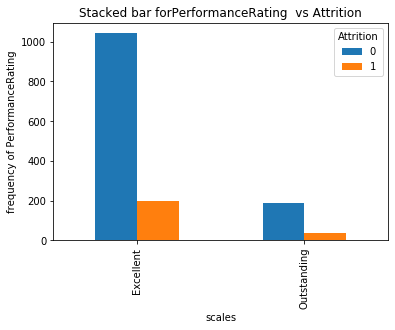

In [24]:
#Visualization
pd.crosstab(data.PerformanceRating,data.Attrition).plot(kind='bar')
plt.title('Stacked bar forPerformanceRating  vs Attrition')
plt.xlabel('scales')
plt.ylabel('frequency of PerformanceRating')

In [25]:
#6.RelationshipSatisfaction
data['RelationshipSatisfaction']=np.where(data['RelationshipSatisfaction']=='1','Low',data['RelationshipSatisfaction'])
data['RelationshipSatisfaction']=np.where(data['RelationshipSatisfaction']=='2','Medium',data['RelationshipSatisfaction'])
data['RelationshipSatisfaction']=np.where(data['RelationshipSatisfaction']=='3','High',data['RelationshipSatisfaction'])
data['RelationshipSatisfaction']=np.where(data['RelationshipSatisfaction']=='4','Very High',data['RelationshipSatisfaction'])
data.groupby('RelationshipSatisfaction').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
RelationshipSatisfaction,,,,,,,,,,,,,,,,,,,,
1,36.192029,797.130435,8.728261,1.0,1055.927536,65.152174,2.021739,6177.793478,14799.438406,2.344203,15.463768,80.0,0.840580,10.913043,2.793478,2.735507,7.173913,4.507246,2.213768,4.387681
High,36.843137,787.762527,9.058824,1.0,1019.309368,64.891068,2.058824,6543.773420,14328.864924,2.788671,15.047930,80.0,0.816993,11.357298,2.812636,2.727669,6.793028,3.997821,1.858388,3.915033
Medium,36.702970,812.656766,9.788779,1.0,1096.864686,67.587459,2.062706,6596.983498,13712.881188,2.752475,15.372937,80.0,0.815182,11.231023,2.788779,2.785479,6.633663,4.168317,2.118812,3.927393
Very High,37.631944,814.416667,9.212963,1.0,960.423611,66.236111,2.097222,6601.296296,14406.631944,2.773148,15.104167,80.0,0.724537,11.465278,2.796296,2.796296,7.393519,4.340278,2.569444,4.312500


Text(0, 0.5, 'frequency of RelationshipSatisfaction ')

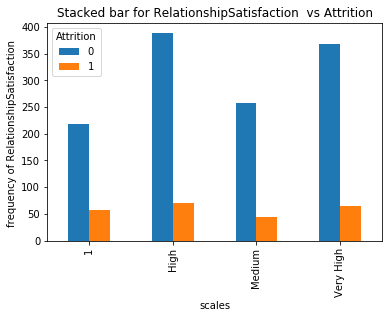

In [26]:
#Visualization
pd.crosstab(data.RelationshipSatisfaction,data.Attrition).plot(kind='bar')
plt.title('Stacked bar for RelationshipSatisfaction  vs Attrition')
plt.xlabel('scales')
plt.ylabel('frequency of RelationshipSatisfaction ')

In [27]:
#WorkLifeBalance 
data['WorkLifeBalance']=np.where(data['WorkLifeBalance']=='1','Bad',data['WorkLifeBalance'])
data['WorkLifeBalance']=np.where(data['WorkLifeBalance']=='2','Good',data['WorkLifeBalance'])
data['WorkLifeBalance']=np.where(data['WorkLifeBalance']=='3','Better',data['WorkLifeBalance'])
data['WorkLifeBalance']=np.where(data['WorkLifeBalance']=='4','Best',data['WorkLifeBalance'])
data.groupby('WorkLifeBalance').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
WorkLifeBalance,,,,,,,,,,,,,,,,,,,
1,37.287500,812.100000,9.425000,1.0,1014.237500,63.800000,1.875000,5887.137500,13732.137500,3.125000,15.562500,80.0,0.612500,10.675000,2.650000,6.350000,3.462500,1.825000,3.975000
Best,36.568627,765.098039,8.274510,1.0,1059.549020,64.444444,2.117647,6746.352941,13948.098039,2.954248,14.980392,80.0,0.764706,11.307190,2.823529,7.019608,4.352941,2.248366,4.013072
Better,36.849944,798.409854,9.277716,1.0,1019.240761,66.090705,2.077268,6532.232923,14452.003359,2.618141,15.305711,80.0,0.791713,11.225084,2.819709,7.031355,4.328108,2.167973,4.159015
Good,37.188953,827.459302,9.325581,1.0,1026.511628,66.502907,2.049419,6461.808140,14249.979651,2.671512,14.979651,80.0,0.854651,11.549419,2.770349,7.095930,4.095930,2.296512,4.113372


There is equilibrium between work and life balance 

Text(0, 0.5, 'frequency of WorkLifeBalance')

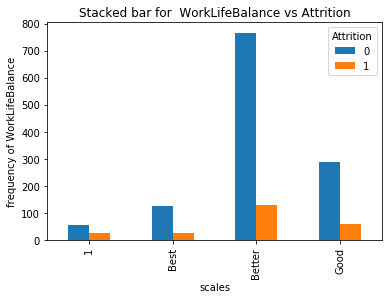

In [28]:
#Visualization
pd.crosstab(data.WorkLifeBalance,data.Attrition).plot(kind='bar')
plt.title('Stacked bar for  WorkLifeBalance vs Attrition')
plt.xlabel('scales')
plt.ylabel('frequency of WorkLifeBalance')

### Create dummy variables on all categorical columns

In [29]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [30]:
cat_vars=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','Over18','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [31]:
cat_vars=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','Over18','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [32]:
data_final=data[to_keep]
data_final.columns.values

array(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_1', 'Education_Bachelor',
       'Education_College', 'Education_Doctor', 'Education_Master',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_High',
       'En

In [33]:
data_final.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [34]:
data_final_vars=data_final.columns.values.tolist()
y=['Attrition']
X=[i for i in data_final_vars if i not in y]

In [35]:
data_final.shape

(1470, 76)

#### Selection of features to be used in building the model

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False  True False  True  True False
  True False False False False False  True False False  True  True False
  True  True  True  True False False  True False False False  True False
 False  True False  True  True False False  True False False False  True
 False False False]
[39 50 35 53 52 54 31 55 56 27 45 41 22 29 15 32 23 20 19  1  1 34 33 18
 11 40 14 38  5 37  9  1 28  1  1 10  1 16 17 13  7 21  1  8 36  1  1  2
  1  1  1  1 30 48  1  3 49 46  1  6 12  1 51  1  1 43 44  1 26 25 24  1
 42  4 47]


In [37]:
cols=['YearsWithCurrManager','BusinessTravel_Non-Travel','EducationField_Human Resources',
       'EducationField_Marketing','EducationField_Medical','EducationField_Technical Degree','Gender_Male','JobInvolvement_Medium','JobInvolvement_Very High','JobRole_Human Resources',
       'JobRole_Laboratory Technician','JobRole_Manager','RelationshipSatisfaction_1','OverTime_No','OverTime_Yes',
       'JobRole_Manufacturing Director','WorkLifeBalance_1','MaritalStatus_Single','JobSatisfaction_Very High',]
X=data_final[cols]
y=data_final['Attrition']

### Model implementation in statistical way

In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.351267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                           18
Date:                Fri, 15 May 2020   Pseudo R-squ.:                  0.2047
Time:                        14:37:50   Log-Likelihood:                -516.36
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 4.782e-46
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
YearsWithCurrManager               -0.1217      0.027     -4.583  

### Logistic Regression Model Fitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [46]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))




Accuracy of logistic regression classifier on test set: 0.86


### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[365   6]
 [ 55  15]]


True No=365,
True Yes=55,
False positive=6,
False negative=55


### Compute precision, recall, F-measure and support

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.71      0.21      0.33        70

    accuracy                           0.86       441
   macro avg       0.79      0.60      0.63       441
weighted avg       0.84      0.86      0.83       441

